# Machine Learning
In this file you can see the documented observations from the PDF file. We have seprepated everything into all the questions. So go ahead a scroll down to the question you are searching for.

## Question One
Which variables can we intuitively accept as independent and which ones as dependent?

### Answer
The independent variables are the variables used as a input for a process that is being analyzed.

The Dependent variables are the output from this process

Telling this the total cases will be the output (the dependent variable) and the independent variables will be new: new cases, total_deaths, new_deaths, population. This is the input for finding out the correlation of the deaths


In [1]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read File & find all headers that can be used.
df = pd.read_csv("Case_PRB.csv")
df.columns

/Users/aaronweggemans/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


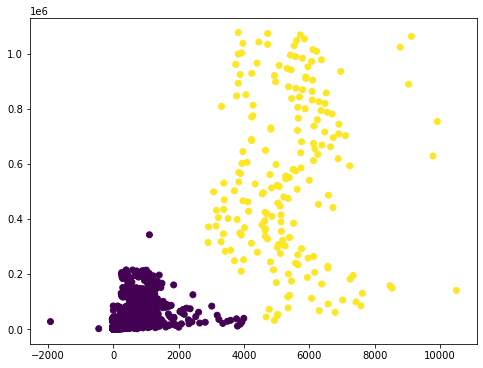

In [4]:
# Preprocess data
clean_df = df[['new_deaths', 'total_deaths']].dropna()
arr = clean_df.to_numpy()

# Model setup
model = KMeans(n_clusters=2)
model = model.fit(scale(clean_df))

# Visualise
plt.figure(figsize=(8, 6))
plt.scatter(arr[:,0], arr[:,1], c=model.labels_.astype(np.float))
plt.show()

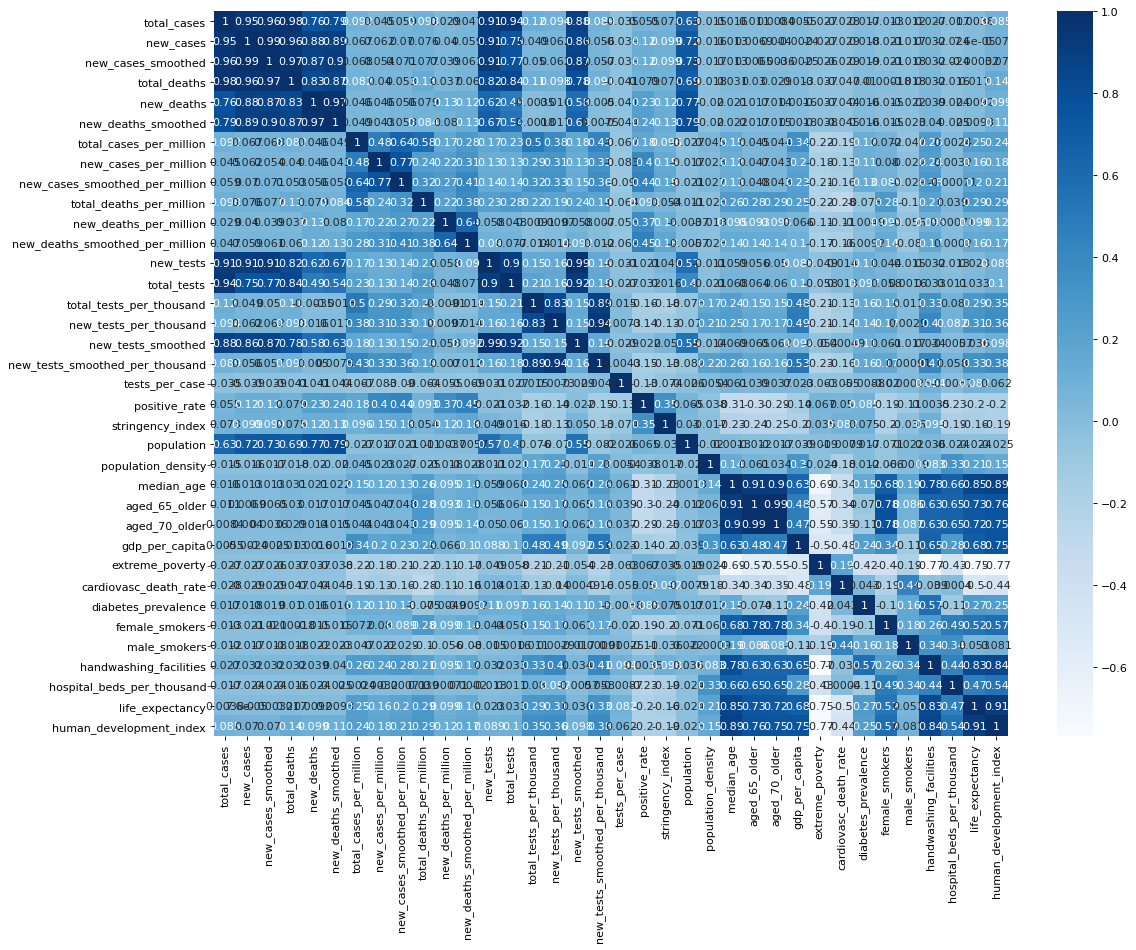

In [18]:
# Change size
plt.figure(figsize=(16, 12), dpi=80)

# Remove useless data that cannot be used
cleaned_df = df[['total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]

# Shows the heatmap correlation, annot shows the data in each cell,
# cmap blues is the color theme, fmt the amount of numbers in the cell
sns.heatmap(cleaned_df.corr(), annot=True, cmap="Blues", fmt='.2g')
plt.show()

The Correlation heatmap, as shown above, provides us a relationship between the variables.


## Question Two
What are your observations on the completeness of the dataset? Which mitigating actions do you plan to take to work around the incompleteness of the dataset?

### Answer
You should probaly clean out the dataset by using the dropna or other methods. It is also possible to remove the outlire's from the dataset

In [56]:
# Remove all values with a string
cleaned_df = df[['total_cases', 'total_deaths', 'new_tests', 'total_tests',
       'tests_per_case', 'positive_rate', 'population_density', 
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'life_expectancy', 'human_development_index']]

cleaned_df.head(1)

,total_cases,total_deaths,new_tests,total_tests,tests_per_case,positive_rate,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
0,2.0,0.0,NaN,NaN,NaN,NaN,584.8,41.2,13.085,7.452,35973.781,NaN,76.29,NaN


In [57]:
# Removes all nan values
df_remove_nan = cleaned_df.dropna()

# Replace nan to 0
df_fill_with_zero = cleaned_df.fillna(0)

# Fills nan to mean values
df_fill_with_mean = cleaned_df.fillna(cleaned_df.mean())

# Fill using last column value
df_fill_with_last_col_value = cleaned_df.fillna(method='ffill')

df_remove_nan.head()

,total_cases,total_deaths,new_tests,total_tests,tests_per_case,positive_rate,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
1654,19.0,1.0,30.0,166.0,7.000,0.143,16.177,31.9,11.198,7.441,18933.907,0.6,76.67,0.825
1656,31.0,1.0,82.0,289.0,8.207,0.122,16.177,31.9,11.198,7.441,18933.907,0.6,76.67,0.825
1657,34.0,2.0,49.0,338.0,10.500,0.095,16.177,31.9,11.198,7.441,18933.907,0.6,76.67,0.825
1658,45.0,2.0,79.0,417.0,9.139,0.109,16.177,31.9,11.198,7.441,18933.907,0.6,76.67,0.825
1659,56.0,2.0,98.0,515.0,9.386,0.107,16.177,31.9,11.198,7.441,18933.907,0.6,76.67,0.825


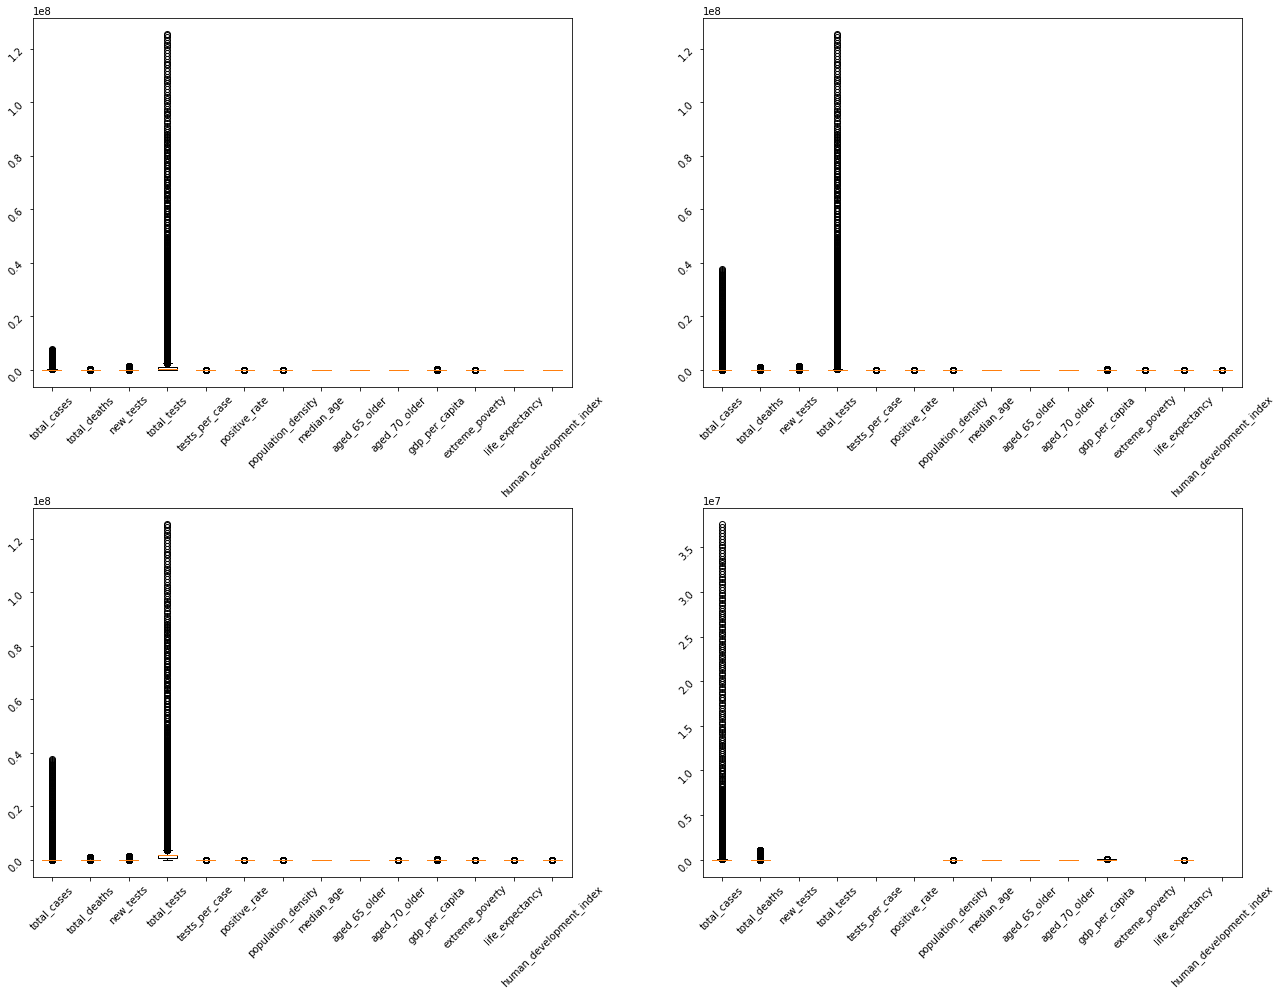

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
fig.tight_layout(pad=10.0)
radius = 45

ax[0, 0].boxplot(
  df_remove_nan.values,
  labels = df_remove_nan.columns.values
)
ax[0, 0].tick_params(labelrotation=radius)

ax[0, 1].boxplot(
  df_fill_with_zero.values,
  labels = df_fill_with_zero.columns.values
)
ax[0, 1].tick_params(labelrotation=radius)

ax[1, 0].boxplot(
  df_fill_with_mean,
  labels = df_fill_with_mean.columns.values
)
ax[1, 0].tick_params(labelrotation=radius)

ax[1, 1].boxplot(
  df_fill_with_last_col_value.values,
  labels = df_fill_with_last_col_value.columns.values
)
ax[1, 1].tick_params(labelrotation=radius)

plt.show()

## Question Three
How do you dissect the data into learning data and test data?

### Answer
Train and test data

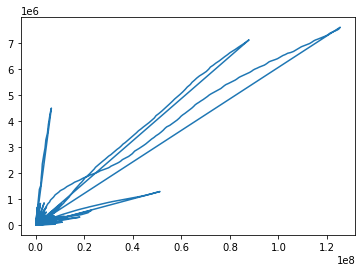

In [93]:
# Data preprocessing
cleaned_df = df[['total_tests', 'total_cases']].dropna()
total_tests = cleaned_df[['total_tests']]
total_cases = cleaned_df[['total_cases']]

plt.plot(total_tests, total_cases)
plt.show()